In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
data=pd.read_csv(r"C:\Users\atanu\OneDrive\Desktop\data science assignment\heart_disease .csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [5]:
data=data.fillna(0)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.0,downsloping,fixed defect,4


In [6]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [8]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.830396,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.079518,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.200000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


<Axes: >

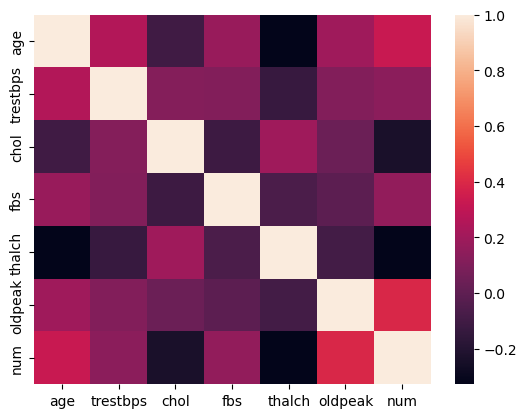

In [9]:
import seaborn as sns
corr=data.corr(numeric_only=True)
sns.heatmap(corr)

In [10]:
# age and cholestrol are negativly correlated
# age and maximum heart rate(thalch) are negativly correlated
# heart disease and age are positivly correlated
# heart disease and oldpeak are positivly correlated

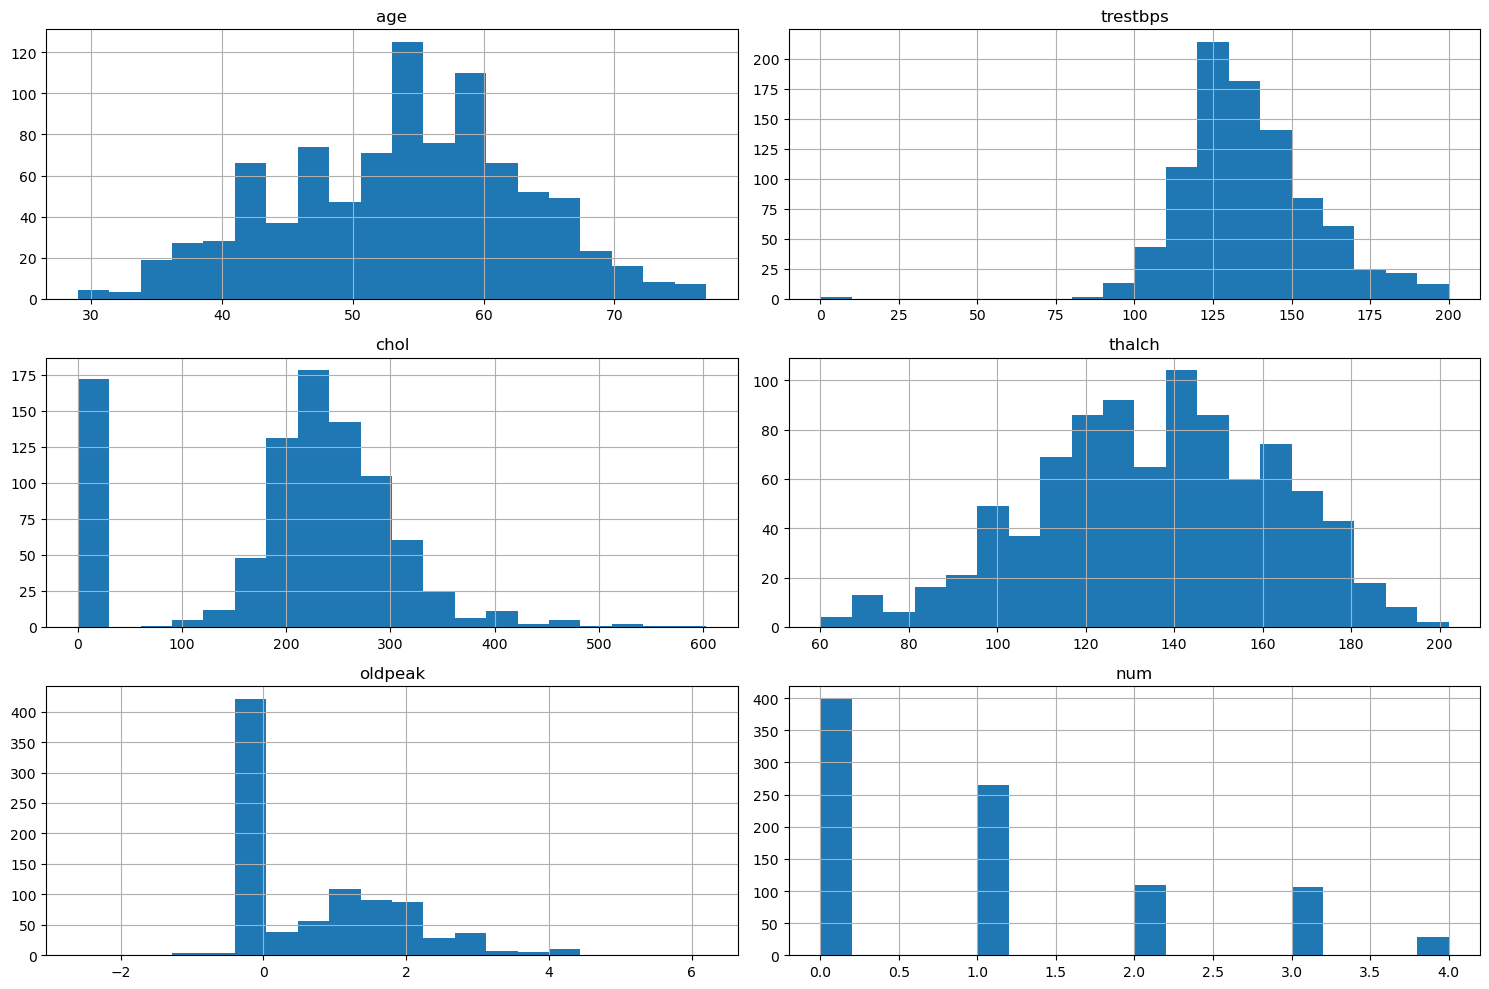

In [11]:
import matplotlib.pyplot as plt
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

<Axes: >

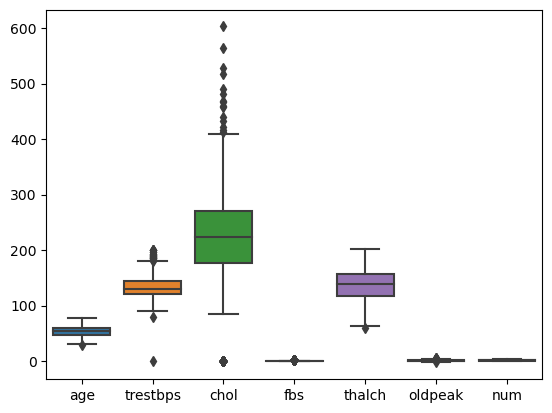

In [12]:
sns.boxplot(data)

In [23]:
data['num'] = data['num'].astype(int)
data['num']

0      0
1      0
2      0
3      0
4      0
      ..
899    4
902    4
904    4
906    4
907    4
Name: num, Length: 673, dtype: int32

In [24]:
# Correct: list of column names, not a DataFrame
numeric_cols =['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num']
column=data[['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num']]

# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    filtered_df = data[(data[column] >= lower) & (data[column] <= upper)]
    return filtered_df

# Apply to all numeric columns one by one
for col in numeric_cols:
    data = remove_outliers_iqr(data, col)

# Check shape after removal
print("Shape after outlier removal:", data.shape)


Shape after outlier removal: (503, 13)


In [25]:
for col in data.select_dtypes(include=object).columns:
    lb=LabelEncoder()
    data[col]=lb.fit_transform(data[col])


In [26]:
x=data.iloc[:,0:12]
y=data.iloc[:,-1:]
y
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
1,41,1,1,135,203,0,1,132,0,0.0,1,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0
5,66,1,0,160,228,0,0,138,0,2.3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
748,63,1,0,130,308,0,1,138,1,2.0,1,2
749,63,1,0,110,252,0,2,140,1,2.0,1,1
764,58,1,2,150,219,0,2,118,1,0.0,0,2
765,58,1,2,150,219,0,2,118,1,0.0,0,1


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [28]:
dt=DecisionTreeClassifier(max_features=3,max_depth=3,min_samples_leaf=5)
y=dt.fit(x_train,y_train)

In [29]:
y_pred=y.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 2, 2,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [30]:
confusion_matrix(y_test,y_pred)

array([[56,  6,  0],
       [ 8, 16,  2],
       [ 6,  2,  5]], dtype=int64)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        62
           1       0.67      0.62      0.64        26
           2       0.71      0.38      0.50        13

    accuracy                           0.76       101
   macro avg       0.73      0.63      0.66       101
weighted avg       0.75      0.76      0.75       101



In [32]:
accuracy_score(y_test,y_pred)

0.7623762376237624

In [33]:
model=dt
params={'max_depth':[3,4,5,7,None],
       'max_features':[3,4,5,6],
       'min_samples_leaf':[3,4,5,2],
       'criterion':['gini','entropy']}
grid_search=GridSearchCV(estimator=model,param_grid=params,cv=5)
grid_fit=grid_search.fit(x_train,y_train)

In [34]:
print(f'best fit params:',grid_fit.best_params_)
print(f'best fit params:',grid_fit.best_score_)


best fit params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 5}
best fit params: 0.7115123456790123


In [37]:
dt_model=DecisionTreeClassifier(criterion="gini",max_features=11,max_depth=3,min_samples_leaf=5)
model_fit=dt_model.fit(x_train,y_train)

[Text(0.5, 0.875, 'cp <= 0.5\ngini = 0.516\nsamples = 402\nvalue = [248, 126, 28]\nclass = 0'),
 Text(0.25, 0.625, 'oldpeak <= 0.7\ngini = 0.595\nsamples = 181\nvalue = [68, 90, 23]\nclass = 1'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'restecg <= 1.5\ngini = 0.508\nsamples = 82\nvalue = [49, 30, 3]\nclass = 0'),
 Text(0.0625, 0.125, 'gini = 0.53\nsamples = 71\nvalue = [39, 29, 3]\nclass = 0'),
 Text(0.1875, 0.125, 'gini = 0.165\nsamples = 11\nvalue = [10, 1, 0]\nclass = 0'),
 Text(0.375, 0.375, 'age <= 55.5\ngini = 0.555\nsamples = 99\nvalue = [19, 60, 20]\nclass = 1'),
 Text(0.3125, 0.125, 'gini = 0.428\nsamples = 57\nvalue = [13, 41, 3]\nclass = 1'),
 Text(0.4375, 0.125, 'gini = 0.611\nsamples = 42\nvalue = [6, 19, 17]\nclass = 1'),
 Text(0.75, 0.625, 'age <= 56.5\ngini = 0.31\nsamples = 221\nvalue = [180, 36, 5]\nclass = 0'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'oldpeak <= 0.75\ngini = 0.196\nsamples = 163\nvalue = [145, 18, 0]\nclass = 0'),
 Text(0.5625, 0

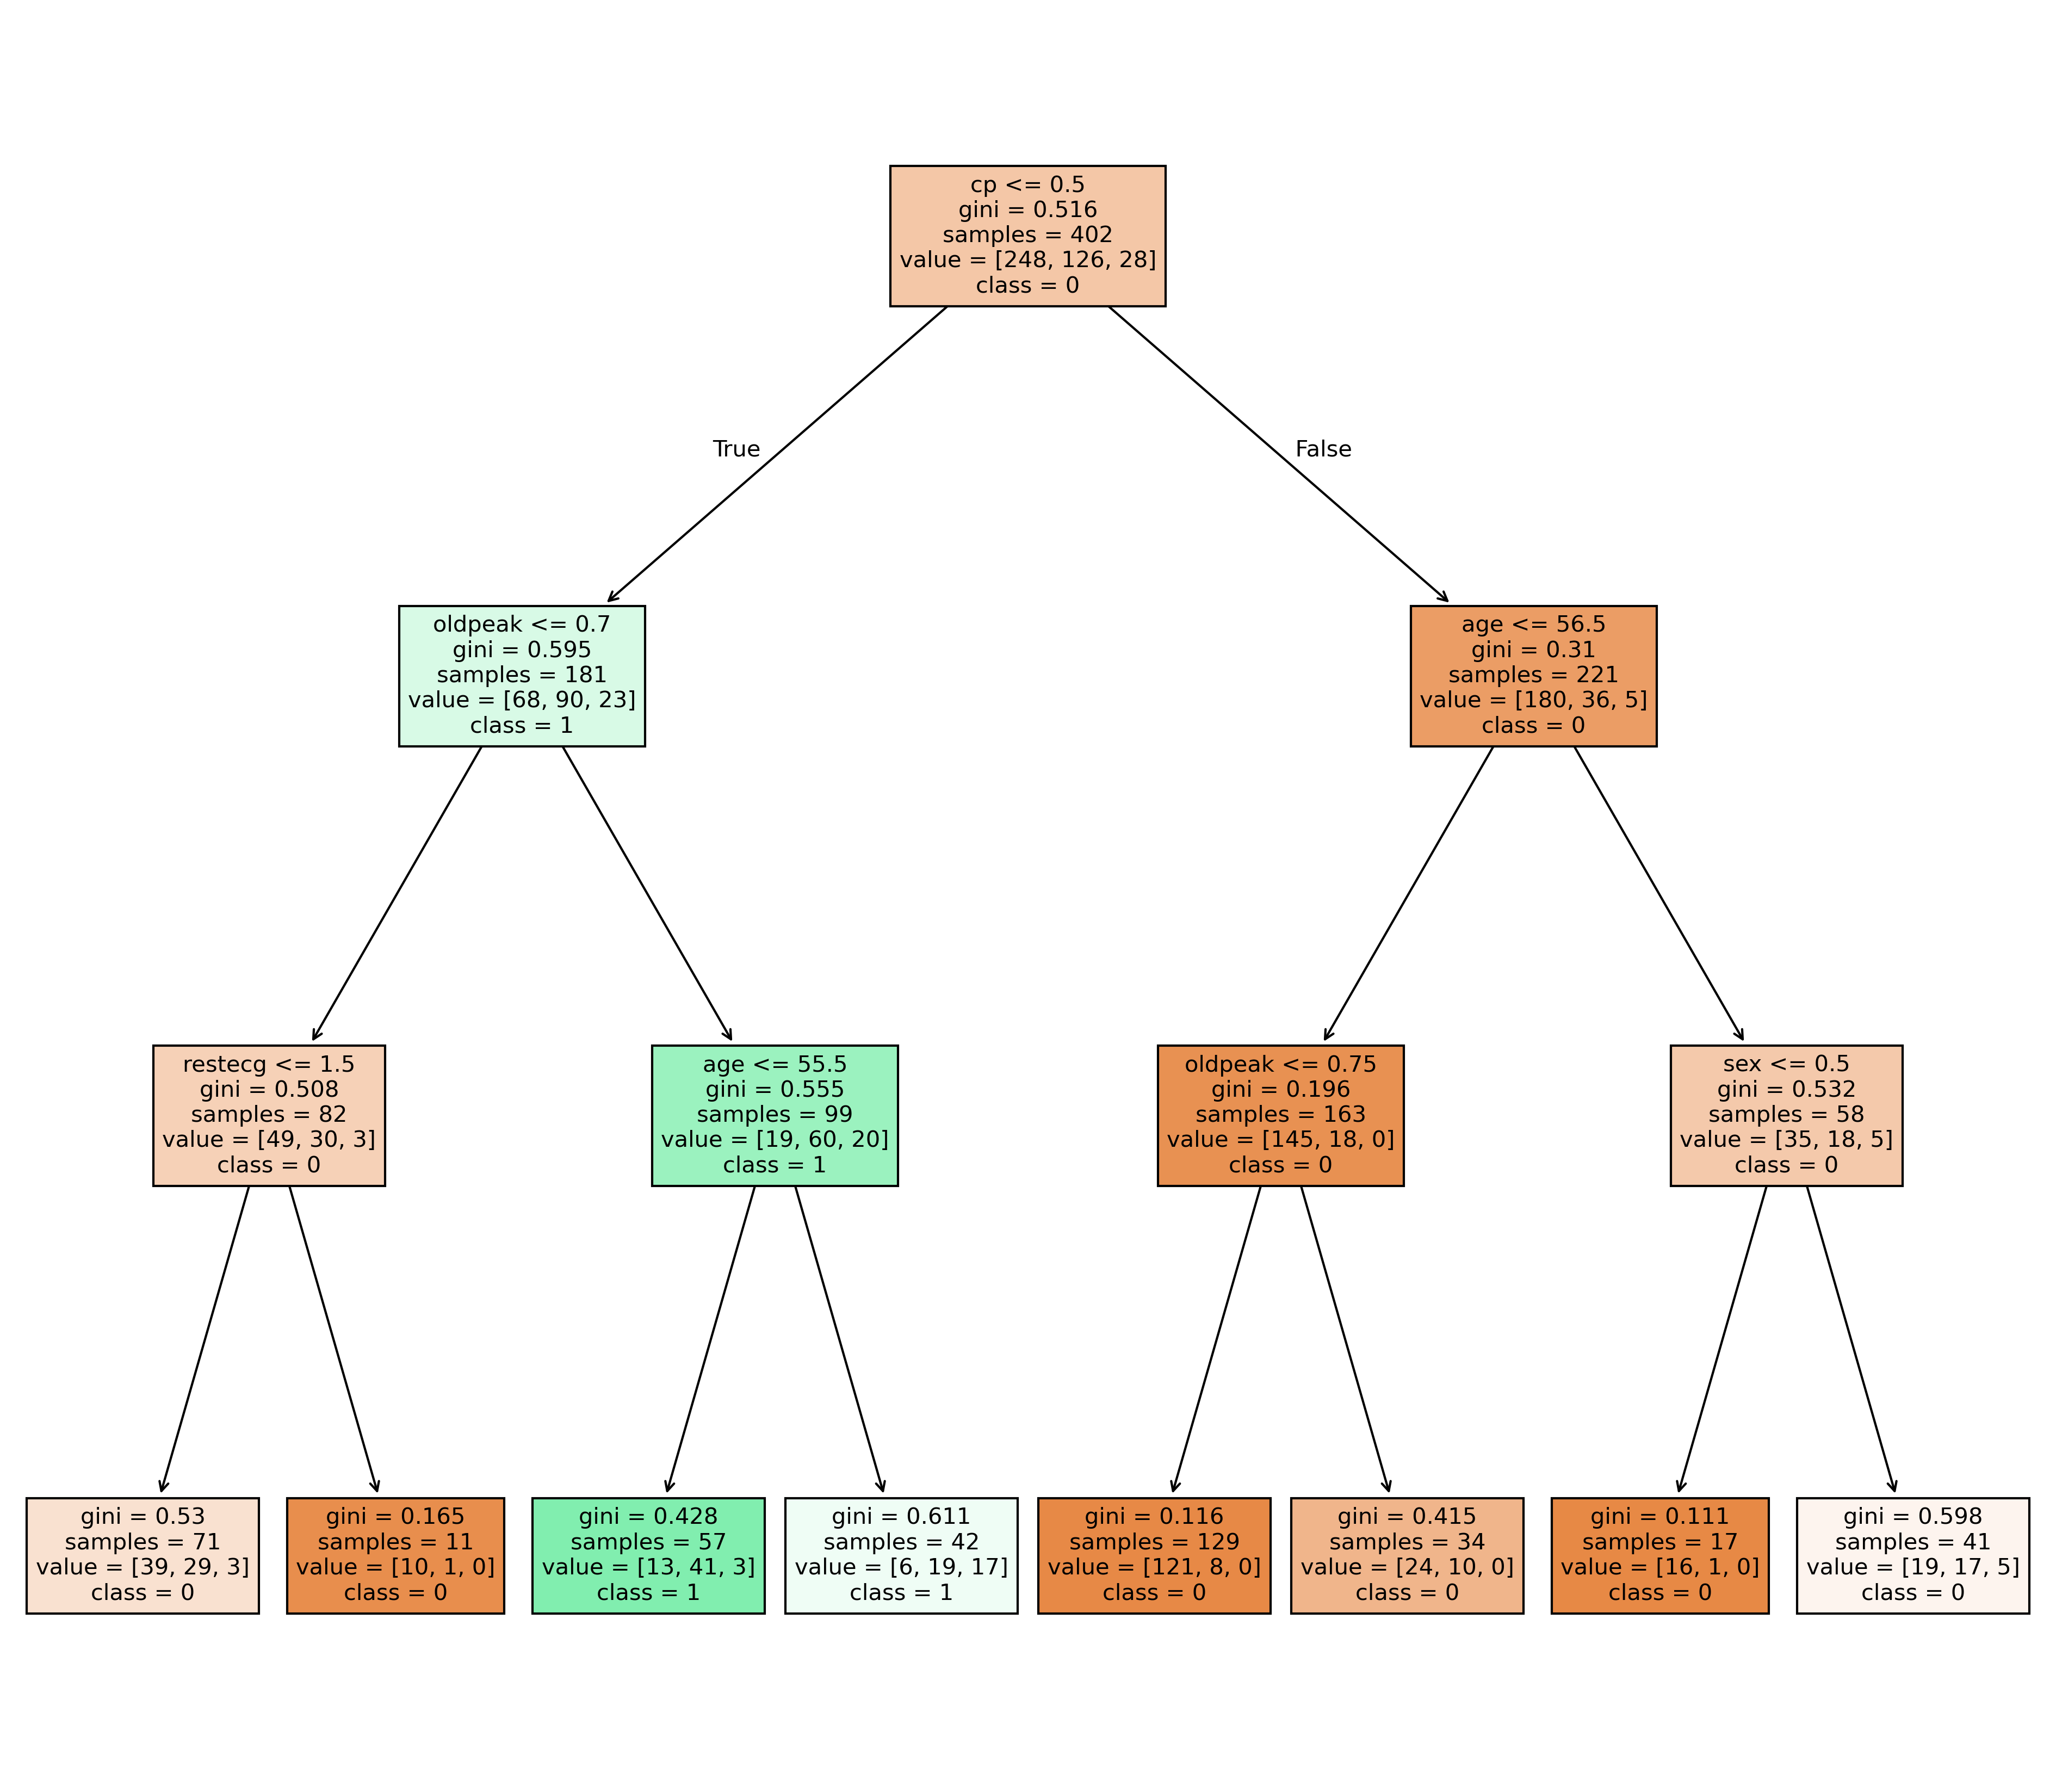

In [38]:
import matplotlib.pyplot as plt
from sklearn import tree
fn=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope']
cn=[str(i) for i in data.num.unique()]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,14), dpi=300)
tree.plot_tree(dt_model,feature_names=fn,class_names=cn,filled=True,fontsize=10)